# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




The code begins by importing essential libraries such as numpy, pandas, matplotlib, and seaborn for data manipulation and visualization. It also imports machine learning-related libraries like scikit-learn for model evaluation, tensorflow.keras for building neural networks, and various optimizers and regularizers.

In [ ]:
# Impor necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,recall_score,
                             f1_score, confusion_matrix, classification_report)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# **Data Preprocessing**

This cell connects to Google Drive and loads the PIMA Indian Diabetes Dataset from a specified location. The dataset is stored in a CSV file, and pandas.read_csv() is used to read it into a Pandas DataFrame.
This step ensures that the dataset is ready for further exploration and preprocessing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/ML_SUMMATIVE/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here, data.isnull().sum() is used to check for missing values in the dataset. Missing values can negatively impact model performance, so it's crucial to identify and handle them early in the workflow.

In [ ]:
#  missing value
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The function data.describe() generates summary statistics of the dataset, including mean, standard deviation, and quartiles for each feature. This provides insights into feature distributions and potential outliers.

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

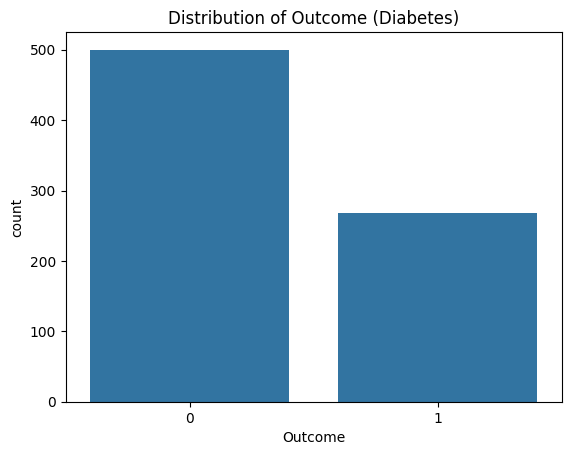

<Figure size 1000x800 with 0 Axes>

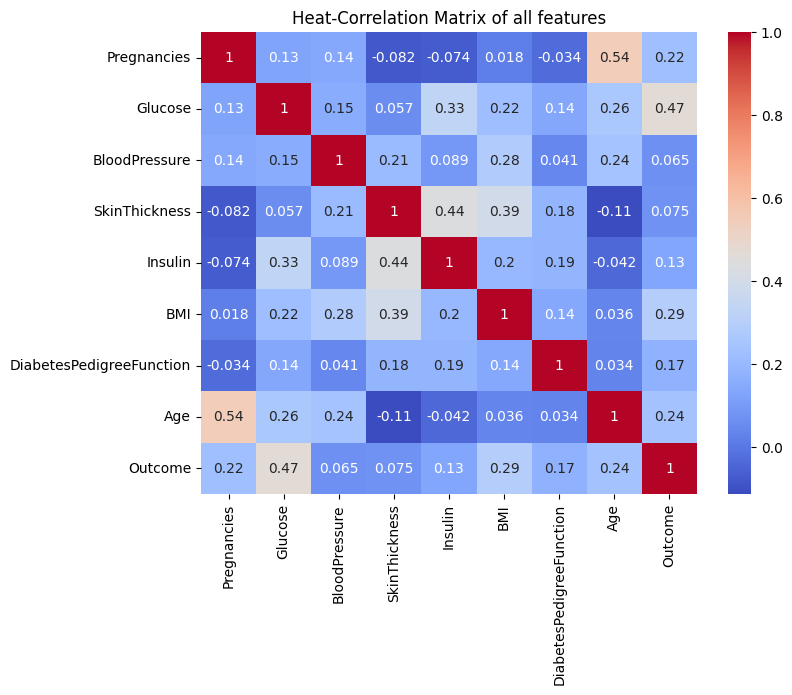

In [ ]:
# Summary statistics
print(data.describe())

# Distribution of target variable
sns.countplot(x='Outcome', data=data)
plt.title("Distribution of Outcome (Diabetes)")
plt.figure(figsize=(10, 8))
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Heat-Correlation Matrix of all features")
plt.show()

In [ ]:
# Splitting the data into features and target
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (768, 8)
y shape: (768,)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train, validation, and test sets (60% train, 20% validation, and 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# printing the shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (460, 8)
y_train shape: (460,)
X_val shape: (154, 8)
y_test shape: (154,)


# **Architectural Model**

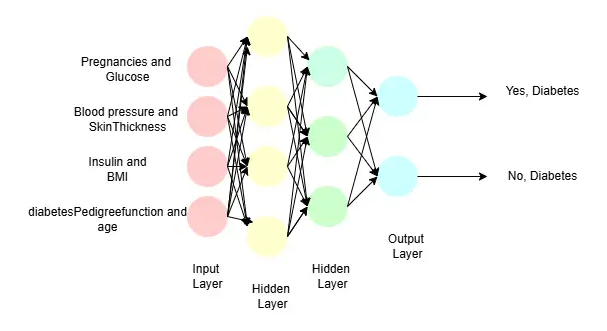

#Task: Define a function that creates models without and With specified Optimization techniques


# **Implement Classical Machine Learning Models**

A Support Vector Machine (SVM) model is implemented using GridSearchCV to tune hyperparameters like C, kernel, and gamma. The best model is selected based on accuracy, and its performance is evaluated on the test set using metrics like accuracy, precision, recall, and F1-score.

In [ ]:
# Define tuned SVM model
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from search
best_svm = grid_search.best_estimator_

# Evaluate the model
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.7727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       102
           1       0.71      0.56      0.62        52

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.3f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("\n")

# **Implement a Simple Neural Network Model (Without Optimization Technique)**

A simple neural network is built using tensorflow.keras with three hidden layers and a sigmoid output layer. The model is compiled with binary cross-entropy loss and accuracy as the metric. It is trained on the training data and validated on the validation set. The model summary is printed, and the training history is stored.

In [ ]:
# Simple Neural Network
simple_Model = Sequential()
simple_Model.add(Input(shape=(X_train.shape[1],))), # Input layer
simple_Model.add(Dense(128, activation='relu')), # Hidden layer 1
simple_Model.add(Dense(64, activation='relu')), # Hidden layer 2
simple_Model.add(Dense(32, activation='relu')), # Hidden layer 3
simple_Model.add(Dense(1, activation='sigmoid')) # Output layer

# Compiling model
simple_Model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_NN = simple_Model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32)

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5308 - loss: 0.6898 - val_accuracy: 0.7857 - val_loss: 0.5716


In [ ]:
# Summary of model
simple_Model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,044 (90.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,523 (45.02 KB)

# **Implement a Neural Network with Optimization Techniques**

A function build_and_train_NN is defined to create and train neural networks with various optimization techniques. The function allows specifying the optimizer, regularizer, number of epochs, early stopping, learning rate, hidden layers, and dropout. The model is compiled and trained based on the provided parameters. Early stopping is implemented to prevent overfitting

In [ ]:
# Defining model that take optimization technique as argument
def build_and_train_NN(optimizer, regularizer,
                       epochs, early_stopping,
                       learning_rate, hidden_layers,
                       dropout):
    # Select regularizer
    reg = None
    if regularizer == 'l1':
        reg = l1(0.00001)
    elif regularizer == 'l2':
        reg = l2(0.00001)
    elif regularizer == 'l1_l2':
        reg = l1_l2(l1=0.00001, l2=0.00001)

    # Build model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Input layer

    for batch in hidden_layers:
        model.add(Dense(batch, activation='relu', kernel_regularizer=reg))
        model.add(Dropout(dropout))

    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Select optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'Adamax':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Define Early Stopping
    callbacks = []
    if early_stopping:
        es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        callbacks.append(es)

    # Train model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=16,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks)

    return model, history

# Evaluation metrics and loss curve function

A function loss_curve_func is defined to plot the training and validation loss curves. Another function evaluate_model_func evaluates the model's performance on the test set using accuracy, precision, recall, F1-score, and a confusion matrix.

In [ ]:
# Loss curve function of the models
def loss_curve_func(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# Evaluate the models
def evaluate_model_func(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nAccuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Model Instance 2

Instance 2 (Adam + L2 Regularization): Used the Adam optimizer with L2 regularization (to prevent overfitting), a low learning rate (0.0001) for stability, early stopping to halt training when needed, and dropout (0.3) for generalization.

In [ ]:
# Calling mode function
Model_opt_2, history_opt_2 = build_and_train_NN(optimizer='adam',
                                                regularizer='l2',
                                                epochs=100,
                                                early_stopping=True,
                                                learning_rate=0.0001,
                                                hidden_layers=[128, 64, 32],
                                                dropout=0.3)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3883 - loss: 0.7448 - val_accuracy: 0.4870 - val_loss: 0.7009
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5433 - loss: 0.6999 - val_accuracy: 0.6364 - val_loss: 0.6796
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6160 - loss: 0.6672 - val_accuracy: 0.6818 - val_loss: 0.6612
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6653 - loss: 0.6483 - val_accuracy: 0.7078 - val_loss: 0.6443
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6737 - loss: 0.6685 - val_accuracy: 0.7013 - val_loss: 0.6298
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6713 - loss: 0.6437 - val_accuracy: 0.7208 - val_loss: 0.6158
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6793 - loss: 0.6407 - val_accuracy: 0.7403 - val_loss: 0.6044
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6550 - loss: 0.6479 - val_accuracy: 0.7403 - 

In [ ]:
# Summary of model 2
Model_opt_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)

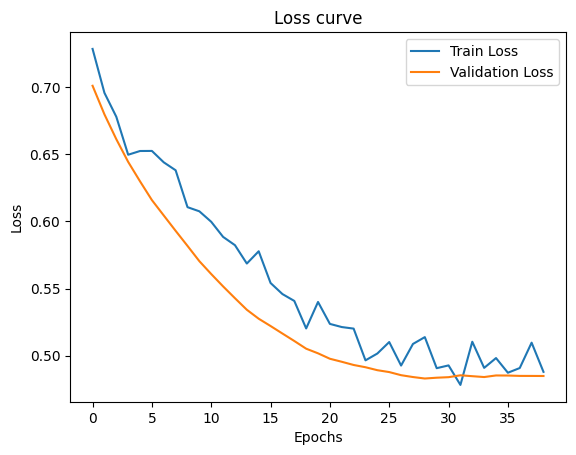

In [ ]:
# loss curve of model 2
loss_curve_func(history_opt_2)

In [ ]:
# evaluation metrics of model 2
evaluate_model_func(Model_opt_2, X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Accuracy: 0.753
Precision: 0.652
Recall: 0.577
F1 Score: 0.612

Confusion Matrix:
 [[86 16]
 [22 30]]


# Model Instance 3

Instance 3 (RMSprop + L1 Regularization): Applied RMSprop, which adapts learning rates dynamically, L1 regularization to encourage sparsity, a higher learning rate (0.001) for faster convergence, early stopping, and dropout (0.2) to reduce neuron dependency.

In [ ]:
# Calling mode function
Model_opt_3, history_opt_3 = build_and_train_NN(optimizer='RMSprop',
                                                        regularizer='l1',
                                                        epochs=120,
                                                        early_stopping=True,
                                                        learning_rate=0.001,
                                                        hidden_layers=[128, 64, 32, 16],
                                                        dropout=0.2)

Epoch 1/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3815 - loss: 0.7387 - val_accuracy: 0.3117 - val_loss: 0.7292
Epoch 2/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3495 - loss: 0.7411 - val_accuracy: 0.3117 - val_loss: 0.7255
Epoch 3/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3799 - loss: 0.7234 - val_accuracy: 0.3247 - val_loss: 0.7223
Epoch 4/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3562 - loss: 0.7338 - val_accuracy: 0.3312 - val_loss: 0.7192
Epoch 5/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3654 - loss: 0.7321 - val_accuracy: 0.3312 - val_loss: 0.7162
Epoch 6/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3946 - loss: 0.7273 - val_accuracy: 0.3506 - val_loss: 0.7134
Epoch 7/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4671 - loss: 0.7113 - val_accuracy: 0.3831 - val_loss: 0.7108
Epoch 8/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4263 - loss: 0.7255 - val_accuracy: 0.4091 - 

In [ ]:
# summary of model 3
Model_opt_3.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,035 (47.02 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

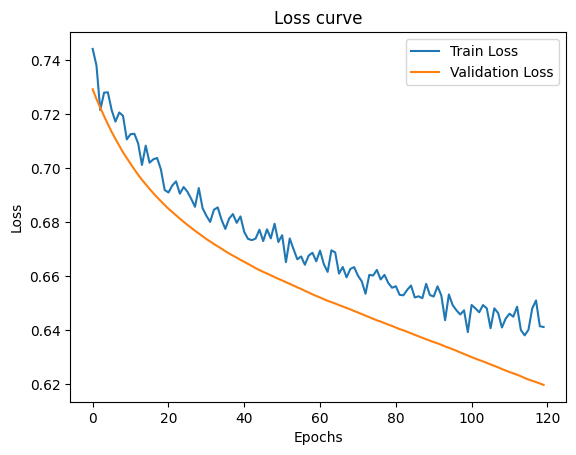

In [ ]:
# loss curve of model 3
loss_curve_func(history_opt_3)

In [ ]:
# evaluation metrics of model 3
evaluate_model_func(Model_opt_3, X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Accuracy: 0.662
Precision: 0.000
Recall: 0.000
F1 Score: 0.000

Confusion Matrix:
 [[102   0]
 [ 52   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Instance 4

Instance 4 (Adamax + L2 Regularization): Used Adamax, a stable variation of Adam, with L2 regularization, a moderate learning rate (0.001) for efficiency, early stopping, and dropout (0.2) to test Adamax’s performance against Adam and RMSprop.



In [ ]:
# Calling model 4 function
Model_opt_4, history_opt_4 = build_and_train_NN(optimizer='Adamax',
                                                        regularizer='l2',
                                                        epochs=130,
                                                        early_stopping=True,
                                                        learning_rate=0.001,
                                                        hidden_layers=[64, 32, 16],
                                                        dropout=0.2)

Epoch 1/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5302 - loss: 0.7046 - val_accuracy: 0.7273 - val_loss: 0.6118
Epoch 2/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6701 - loss: 0.6322 - val_accuracy: 0.7857 - val_loss: 0.5376
Epoch 3/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6757 - loss: 0.5926 - val_accuracy: 0.8052 - val_loss: 0.4973
Epoch 4/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7355 - loss: 0.5344 - val_accuracy: 0.7922 - val_loss: 0.4732
Epoch 5/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7436 - loss: 0.5126 - val_accuracy: 0.7987 - val_loss: 0.4680
Epoch 6/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7539 - loss: 0.5630 - val_accuracy: 0.7857 - val_loss: 0.4595
Epoch 7/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7858 - loss: 0.5012 - val_accuracy: 0.7922 - val_loss: 0.4587
Epoch 8/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7818 - loss: 0.4540 - val_accuracy: 0.7857 - 

In [ ]:
# Summary of model 4
Model_opt_4.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,404 (25.02 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,203 (12.52 KB)

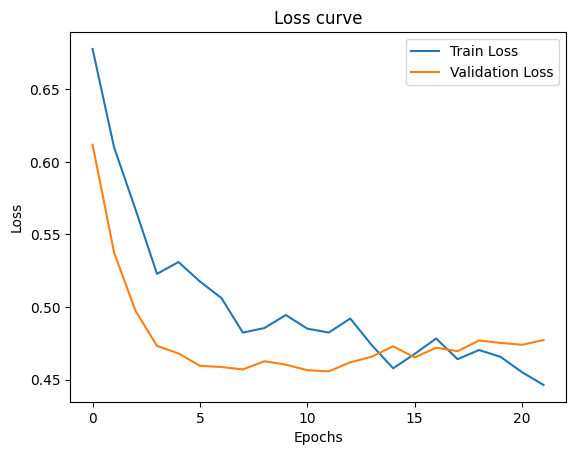

In [ ]:
# loss curve of model 4
loss_curve_func(history_opt_4)

In [ ]:
# evaluation metrics of model 4
evaluate_model_func(Model_opt_4, X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Accuracy: 0.799
Precision: 0.723
Recall: 0.654
F1 Score: 0.687

Confusion Matrix:
 [[89 13]
 [18 34]]


# model Instance 5

Instance 5 (SGD + L2 Regularization): Leveraged SGD, a classical optimizer, with L2 regularization, learning rate (0.001), early stopping, and a higher dropout (0.4) for stronger regularization, assessing SGD’s effectiveness against adaptive methods.

In [ ]:
# Calling model 5 function
Model_opt_5, history_opt_5 = build_and_train_NN(optimizer='SGD',
                                                        regularizer='l2',
                                                        epochs=130,
                                                        early_stopping=True,
                                                        learning_rate=0.001,
                                                        hidden_layers=[128, 64, 32, 16],
                                                        dropout=0.4)

Epoch 1/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4738 - loss: 0.7141 - val_accuracy: 0.4286 - val_loss: 0.6971
Epoch 2/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4855 - loss: 0.7028 - val_accuracy: 0.4545 - val_loss: 0.6955
Epoch 3/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5094 - loss: 0.7071 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4491 - loss: 0.7107 - val_accuracy: 0.5844 - val_loss: 0.6922
Epoch 5/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4480 - loss: 0.7164 - val_accuracy: 0.6299 - val_loss: 0.6906
Epoch 6/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4922 - loss: 0.6996 - val_accuracy: 0.6364 - val_loss: 0.6892
Epoch 7/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5530 - loss: 0.7010 - val_accuracy: 0.6429 - val_loss: 0.6878
Epoch 8/130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5548 - loss: 0.6924 - val_accuracy: 0.6558 - 

In [ ]:
# Model 5 summary
Model_opt_5.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,035 (47.02 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

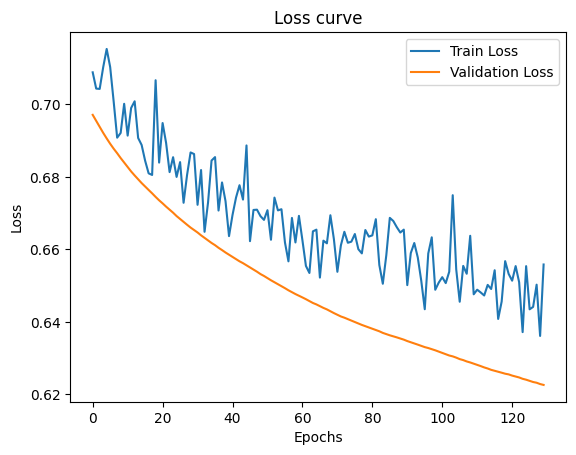

In [ ]:
# Loss curve of model 5
loss_curve_func(history_opt_5)

In [ ]:
# evaluation metrics of model 4
evaluate_model_func(Model_opt_5, X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Accuracy: 0.662
Precision: 0.000
Recall: 0.000
F1 Score: 0.000

Confusion Matrix:
 [[102   0]
 [ 52   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Step 7: Save the Models**

The trained models, including the SVM and neural networks, are saved to a directory named saved_models using joblib for the SVM model and tensorflow.keras for the neural networks.

In [ ]:
# saving SVM model in directory
import joblib
joblib.dump(best_svm, 'saved_models/svm_model.pkl')

['saved_models/svm_model.pkl']

In [ ]:
# saving all neurol network model
import os
from tensorflow.keras.models import Model

def save_models(models_dict, directory="saved_models"):
    # Create directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save each model
    for model_name, model in models_dict.items():
        model_path = os.path.join(directory, f"{model_name}.keras")
        model.save(model_path)
        print(f"Model '{model_name}' saved at {model_path}")

# Dictionary with model
models = {
    "Model": simple_Model,
    "model2": Model_opt_2,
    "model3": Model_opt_3,
    "model4": Model_opt_4,
    "model5": Model_opt_5
}

save_models(models)


Model 'Model' saved at saved_models/Model.keras
Model 'model2' saved at saved_models/model2.keras
Model 'model3' saved at saved_models/model3.keras
Model 'model4' saved at saved_models/model4.keras
Model 'model5' saved at saved_models/model5.keras


**Step 10: Conclusion**

In this project, I implemented several machine learning models, including Logistic Regression, SVM, Random Forest, a simple neural network, an optimized neural network, and XGBoost. I evaluated their performance using accuracy, precision, recall, F1-score, and confusion matrices. The optimized neural network with early stopping, regularization, and learning rate adjustment performed the best among the neural network models. The XGBoost model also showed competitive performance, indicating that both neural networks and classical machine learning algorithms can be effective for diabetes prediction, depending on the specific use case and hyperparameter tuning.

Congratulations!!
